# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Testing the data from the url
#url = "http://api.openweathermap.org/data/2.5/forecast?"

In [4]:
#response = requests.get(url).json()

In [5]:
#from pprint import pprint

In [6]:
# View the output for making values to append to lists
#pprint(response)

In [7]:
#response["city"]["name"]

In [8]:
# Processing the data
url = "http://api.openweathermap.org/data/2.5/forecast?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="



# Lists for holding values for the data
cloudiness = []
humidity = []
lat = []
lon = []
temp = []
wind_speed = []
country = []
date = []
max_temp = []
city_list = []


# Printing out the results of each city being processed from the successive API calls
print("Beginning Data Retrieval")
print("-----------------------------")
      
index = 1      
set_num = 1


for city in cities:  

    try:   
        response = requests.get(query_url + city).json()  
        
        print(f"Processing Record {index} of Set {set_num} | " + city)

        
        cloudiness.append(response["list"][0]["clouds"]["all"])
        humidity.append(response["list"][0]["main"]["humidity"])               
        lat.append(response["city"]["coord"]["lat"])
        lon.append(response["city"]["coord"]["lon"])
        temp.append(response["list"][0]["main"]["temp"])
        wind_speed.append(response["list"][0]["wind"]["speed"])
        country.append(response["city"]["country"])
        date.append(response["list"][0]["dt"])
        max_temp.append(response["list"][0]["main"]["temp_max"])
        city_list.append(response["city"]["name"])
        index+=1
        
        if(index > 50):
            set_num+=1
            index = 0

        
# Print this output if city is not found
    except(KeyError, ValueError):
        print("City not found. Skipping...")

    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | kosonsoy
Processing Record 3 of Set 1 | constitucion
Processing Record 4 of Set 1 | itarema
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | faya
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | airai
Processing Record 9 of Set 1 | acarau
City not found. Skipping...
Processing Record 9 of Set 1 | zeya
Processing Record 10 of Set 1 | kawalu
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | katangli
Processing Record 16 of Set 1 | bukama
Processing Record 17 of Set 1 | namatanai
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | xushan
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 

Processing Record 14 of Set 4 | kalachinsk
Processing Record 15 of Set 4 | sheopur
Processing Record 16 of Set 4 | tiksi
Processing Record 17 of Set 4 | aykhal
Processing Record 18 of Set 4 | papara
Processing Record 19 of Set 4 | georgetown
Processing Record 20 of Set 4 | penzance
Processing Record 21 of Set 4 | port alfred
Processing Record 22 of Set 4 | arraial do cabo
Processing Record 23 of Set 4 | magadi
Processing Record 24 of Set 4 | hualmay
Processing Record 25 of Set 4 | khatanga
Processing Record 26 of Set 4 | kirovsk
Processing Record 27 of Set 4 | deputatskiy
Processing Record 28 of Set 4 | banjar
Processing Record 29 of Set 4 | kruisfontein
Processing Record 30 of Set 4 | coihaique
Processing Record 31 of Set 4 | voh
Processing Record 32 of Set 4 | nouadhibou
Processing Record 33 of Set 4 | the valley
Processing Record 34 of Set 4 | san patricio
Processing Record 35 of Set 4 | marcona
City not found. Skipping...
Processing Record 35 of Set 4 | el faiyum
City not found. Sk

Processing Record 34 of Set 7 | hirara
Processing Record 35 of Set 7 | weinan
Processing Record 36 of Set 7 | vadeni
Processing Record 37 of Set 7 | lagunas
Processing Record 38 of Set 7 | buin
Processing Record 39 of Set 7 | starup
Processing Record 40 of Set 7 | opuwo
Processing Record 41 of Set 7 | mulanje
Processing Record 42 of Set 7 | leningradskiy
Processing Record 43 of Set 7 | conceicao do araguaia
Processing Record 44 of Set 7 | severo-kurilsk
Processing Record 45 of Set 7 | vorukh
Processing Record 46 of Set 7 | kavieng
Processing Record 47 of Set 7 | mgandu
Processing Record 48 of Set 7 | nome
Processing Record 49 of Set 7 | guerrero negro
Processing Record 50 of Set 7 | santiago
Processing Record 0 of Set 8 | chipinge
Processing Record 1 of Set 8 | lhuntshi
City not found. Skipping...
Processing Record 1 of Set 8 | sao francisco
Processing Record 2 of Set 8 | kamien pomorski
Processing Record 3 of Set 8 | warrington
Processing Record 4 of Set 8 | ballina
Processing Record 

Processing Record 44 of Set 10 | coos bay
Processing Record 45 of Set 10 | koroni
Processing Record 46 of Set 10 | avon lake
Processing Record 47 of Set 10 | sulangan
Processing Record 48 of Set 10 | balkhash
Processing Record 49 of Set 10 | karauzyak
City not found. Skipping...
Processing Record 49 of Set 10 | kirkuk
Processing Record 50 of Set 10 | moerai
Processing Record 0 of Set 11 | mantua
Processing Record 1 of Set 11 | berdigestyakh
Processing Record 2 of Set 11 | shagonar
Processing Record 3 of Set 11 | maslovare
Processing Record 4 of Set 11 | champerico
Processing Record 5 of Set 11 | longyan
Processing Record 6 of Set 11 | chake chake
Processing Record 7 of Set 11 | kirakira
Processing Record 8 of Set 11 | pankovka
Processing Record 9 of Set 11 | gryazi
Processing Record 10 of Set 11 | olafsvik
City not found. Skipping...
Processing Record 10 of Set 11 | karoi
Processing Record 11 of Set 11 | naryan-mar
Processing Record 12 of Set 11 | palmeirais
Processing Record 13 of Set

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Make the dataframe
city_data = pd.DataFrame({"City": city_list,
                      "Cloudiness": cloudiness, 
                      "Country": country, 
                      "Date": date, 
                      "Humidity": humidity,
                      "Lat": lat, 
                  "Lng": lon, 
                   "Max Temp": max_temp, 
                   "Wind Speed": wind_speed})


# Save city data to a csv file
city_data.to_csv("output_data/cities.csv", encoding="utf-8", index=False)


# Display the dataframe
total = city_data.count()
total

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [12]:
# Display the head of dataframe columns for the data
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Port Elizabeth,0,US,1553364000,47,39.3134,-74.9811,51.51,22.41
1,Kosonsoy,64,UZ,1553374800,92,41.2521,71.5452,40.93,1.61
2,Constitucion,0,MX,1553364000,26,23.9912,-104.6750,80.58,4.41
3,Itarema,92,BR,1553364000,97,-2.9248,-39.9167,80.49,5.08
4,Saint-Philippe,0,CA,1553364000,84,45.3584,-73.4791,35.59,13.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

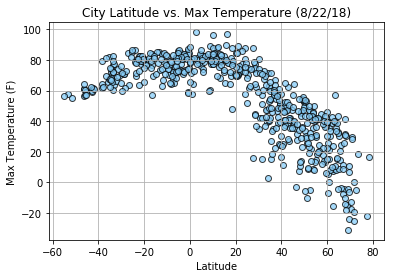

In [13]:
# Make the x and y coordinates
x1 = city_data["Lat"]
y1 = city_data["Max Temp"]


# Make the scatter plot data
plt.scatter(x1, y1, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Max Temperature (8/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_temp.png")


# Display the graph
plt.show()

#### Latitude vs. Humidity Plot

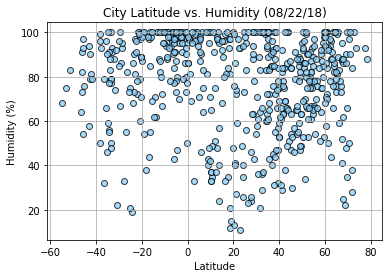

In [14]:
# Make the x and y coordinates
x2 = city_data["Lat"]
y2 = city_data["Humidity"]


# Make the scatter plot data
plt.scatter(x2, y2, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_humidity.png")


# Display the graph
plt.show()

#### Latitude vs. Cloudiness Plot

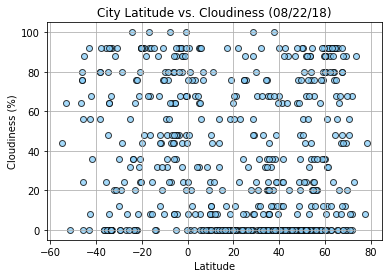

In [15]:
# Make the x and y coordinates
x3 = city_data["Lat"]
y3 = city_data["Cloudiness"]


# Make the scatter plot data
plt.scatter(x3, y3, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_cloudiness.png")


# Display the graph
plt.show()

#### Latitude vs. Wind Speed Plot

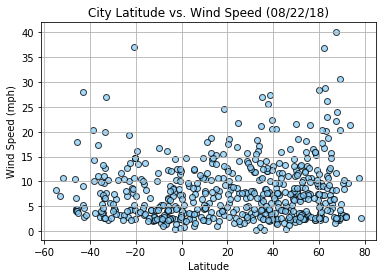

In [16]:
# Make the x and y coordinates
x4 = city_data["Lat"]
y4 = city_data["Wind Speed"]


# Make the scatter plot data
plt.scatter(x4, y4, marker="o", facecolors="lightskyblue", edgecolor="black", alpha=0.75)


# Make titles for the graph, x-axis, and y-axis along with adding the grid
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Save plotted figure as png file
plt.savefig("images/latitude_windspeed.png")


# Display the graph
plt.show()

In [ ]:
# Three observable trends based on the data:
# (1) From the data, I noticed that the city latitude seems to have an opposite relationship with humidity compared
#     to wind speed. The city latitude values mostly have high percents of humidity while they mostly have low wind
#     speeds in mph.
# (2) The max temperature values peak between the city latitudes of 0 and 20 before going on a downward trend.
# (3) The city latitude doesn't seem to have a consistent trend with cloudiness with the data being spread out.
